In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
df = pd.DataFrame(columns=['filename','label'])

In [3]:
df.head()

,filename,label


In [4]:
for file in os.listdir('./data/scene_classification/seg_train/seg_train/buildings'):
    df.loc[len(df)] = [file,'buildings']

In [5]:
for file in os.listdir('./data/scene_classification/seg_train/seg_train/forest'):
    df.loc[len(df)] = [file,'forest']

In [6]:
for file in os.listdir('./data/scene_classification/seg_train/seg_train/glacier'):
    df.loc[len(df)] = [file,'glacier']

In [7]:
for file in os.listdir('./data/scene_classification/seg_train/seg_train/mountain'):
    df.loc[len(df)] = [file,'mountain']

In [8]:
for file in os.listdir('./data/scene_classification/seg_train/seg_train/sea'):
    df.loc[len(df)] = [file,'sea']

In [9]:
for file in os.listdir('./data/scene_classification/seg_train/seg_train/street'):
    df.loc[len(df)] = [file,'street']

In [10]:
df = df.sample(frac=1).reset_index(drop=True)

In [11]:
df.head()

,filename,label
0,18913.jpg,forest
1,14849.jpg,mountain
2,18538.jpg,buildings
3,19026.jpg,forest
4,13336.jpg,street


In [12]:
df_train,df_val = train_test_split(df,test_size=0.2,random_state=42)

In [13]:
df_train.head()

,filename,label
7971,18853.jpg,glacier
11591,12988.jpg,street
4949,12511.jpg,sea
11527,8231.jpg,glacier
8678,6242.jpg,sea


In [14]:
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True,vertical_flip=True,brightness_range=[0.5,1.5])
val_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_dataframe(dataframe = df_train,directory = './data/scene_classification/seg_train/seg_train/images/',x_col = 'filename',y_col = 'label',class_mode = 'categorical',target_size = (150,150),batch_size = 32,shuffle = True)
validation_set = val_datagen.flow_from_dataframe(dataframe = df_val,directory = './data/scene_classification/seg_train/seg_train/images/',x_col = 'filename',y_col = 'label',class_mode = 'categorical',target_size = (150,150),batch_size = 32,shuffle = True)

Found 11227 validated image filenames belonging to 6 classes.
Found 2807 validated image filenames belonging to 6 classes.


In [15]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(6,activation='softmax')
])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [17]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [18]:
history = model.fit(training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
351/351 [==============================] - 353s 1s/step - loss: 1.1901 - accuracy: 0.5115 - val_loss: 1.1105 - val_accuracy: 0.5604
Epoch 2/10
351/351 [==============================] - 414s 1s/step - loss: 0.9270 - accuracy: 0.6347 - val_loss: 0.8909 - val_accuracy: 0.6402
Epoch 3/10
351/351 [==============================] - 396s 1s/step - loss: 0.8012 - accuracy: 0.6943 - val_loss: 0.6723 - val_accuracy: 0.7499
Epoch 4/10
351/351 [==============================] - 383s 1s/step - loss: 0.7131 - accuracy: 0.7290 - val_loss: 0.6104 - val_accuracy: 0.7702
Epoch 5/10
351/351 [==============================] - 367s 1s/step - loss: 0.6350 - accuracy: 0.7642 - val_loss: 0.7647 - val_accuracy: 0.7253
Epoch 6/10
351/351 [==============================] - 320s 911ms/step - loss: 0.5907 - accuracy: 0.7802 - val_loss: 0.5213 - val_accuracy: 0.8137
Epoch 7/10
351/351 [==============================] - 320s 912ms/step - loss: 0.5567 - accuracy: 0.7945 - val_loss: 0.5248 - val_accuracy: 

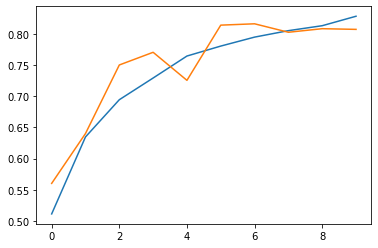

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [32]:
path = './models/scene_classification/'
model.save(path+'model.h5')
model.save_weights(path+'weights.h5')

In [33]:
new_model = tf.keras.models.load_model(path+'model.h5')

In [34]:
loss,accuracy = new_model.evaluate(validation_set)

88/88 [==============================] - 19s 217ms/step - loss: 0.5934 - accuracy: 0.8069


In [35]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

5

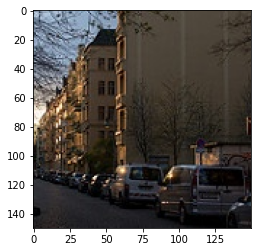

In [40]:
import cv2
# Utility
import itertools
import random
from collections import Counter
from glob import iglob
def load_image(filename):
    img = mpimg.imread('data/Scene_Classification/seg_train/seg_train/images/' + filename)
    img = cv2.resize(img, (150,150) )
    img = img /255
    
    return img
def predict(image):
    probabilities = model.predict(np.asarray([img]))[0]
    class_idx = np.argmax(probabilities)
    
    return class_idx
plt.imshow(mpimg.imread('data/Scene_Classification/seg_train/seg_train/street/2.jpg'))
img = load_image('2.jpg')
predict(img)